In [63]:
import sys
sys.path.append("./tools/")
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from pprint import pprint

In [39]:
# Get the data
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
pprint(data_dict)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                     'deferred_income': -1386055,
                     'director_fees': 'NaN',
                     'email_address': 'andrew.fastow@enron.com',
                     'exercised_stock_options': 'NaN',
                     'expenses': 55921,
                     'from_messages': 'NaN',
                     'from_poi_to_this_person': 'NaN',
                     'from_this_person_to_poi': 'NaN',
                     'loan_advances': 'NaN',
                     'long_term_incentive': 1736055,
                     'other': 277464,
                     'poi': True,
                     'restricted_stock': 1794412,
                     'restricted_stock_deferred': 'NaN',
                     'salary': 440698,
                     'shared_receipt_with_poi': 'NaN',
                     'to_messages': 'NaN',
                     'total_payments': 2424083,
                     'total_stock_value': 1794412},
 'FITZGERALD JAY L': {'bonus': 350000,
                      'deferral_payme

                  'exercised_stock_options': 'NaN',
                  'expenses': 'NaN',
                  'from_messages': 38,
                  'from_poi_to_this_person': 37,
                  'from_this_person_to_poi': 13,
                  'loan_advances': 'NaN',
                  'long_term_incentive': 476451,
                  'other': 111122,
                  'poi': False,
                  'restricted_stock': 698920,
                  'restricted_stock_deferred': 'NaN',
                  'salary': 257486,
                  'shared_receipt_with_poi': 2565,
                  'to_messages': 2647,
                  'total_payments': 1545059,
                  'total_stock_value': 698920},
 'TAYLOR MITCHELL S': {'bonus': 600000,
                       'deferral_payments': 227449,
                       'deferred_income': 'NaN',
                       'director_fees': 'NaN',
                       'email_address': 'mitchell.taylor@enron.com',
                       'exercised_stock_

In [40]:
# Trasform into a dataframe
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


In [42]:
df.shape

(146, 21)

In [43]:
df.replace('NaN', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [44]:
# Drop the email_address col
df.drop('email_address', axis=1, inplace=True)
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,56301.0,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,11200.0,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,129142.0,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,NaN


In [45]:
# Get the percent of null values in each col
def find_null_perc(df):
    """
    Given @df, find percent of nulls in all cols
    """
    null_percent = df.isnull().sum(axis=0)/len(df)
    return(null_percent)
    
find_null_perc(df)

salary                       0.349315
to_messages                  0.410959
deferral_payments            0.732877
total_payments               0.143836
exercised_stock_options      0.301370
bonus                        0.438356
restricted_stock             0.246575
shared_receipt_with_poi      0.410959
restricted_stock_deferred    0.876712
total_stock_value            0.136986
expenses                     0.349315
loan_advances                0.972603
from_messages                0.410959
other                        0.363014
from_this_person_to_poi      0.410959
poi                          0.000000
director_fees                0.883562
deferred_income              0.664384
long_term_incentive          0.547945
from_poi_to_this_person      0.410959
dtype: float64

In [46]:
# Get the cols whose null value percentage is over 50%
null_percent = find_null_perc(df)
cols_drop = null_percent[null_percent>=.5]
cols_drop = cols_drop.index.tolist()
print(cols_drop)

['deferral_payments', 'restricted_stock_deferred', 'loan_advances', 'director_fees', 'deferred_income', 'long_term_incentive']


In [47]:
# Now drop these columns from the df
df.drop(cols_drop, axis=1, inplace=True)
df.head()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,NaN


In [48]:
# Convert poi col to numeric
df['poi'].replace([False, True], [0, 1], inplace=True)

In [50]:
df.shape

(146, 14)

In [51]:
# Drop rows where all cells in that row is NA
df.dropna(thresh=2, inplace=True)
df.shape

(145, 14)

In [52]:
# Split the features and labels
y = df['poi'].copy()
X = df.drop('poi', axis=1).copy()
print(X.head())
print(y.head())

                      salary  to_messages  total_payments  \
ALLEN PHILLIP K     201955.0       2902.0       4484442.0   
BADUM JAMES P            NaN          NaN        182466.0   
BANNANTINE JAMES M     477.0        566.0        916197.0   
BAXTER JOHN C       267102.0          NaN       5634343.0   
BAY FRANKLIN R      239671.0          NaN        827696.0   

                    exercised_stock_options      bonus  restricted_stock  \
ALLEN PHILLIP K                   1729541.0  4175000.0          126027.0   
BADUM JAMES P                      257817.0        NaN               NaN   
BANNANTINE JAMES M                4046157.0        NaN         1757552.0   
BAXTER JOHN C                     6680544.0  1200000.0         3942714.0   
BAY FRANKLIN R                          NaN   400000.0          145796.0   

                    shared_receipt_with_poi  total_stock_value  expenses  \
ALLEN PHILLIP K                      1407.0          1729541.0   13868.0   
BADUM JAMES P           

In [53]:
X.head()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,NaN


In [54]:
y.head()

ALLEN PHILLIP K       0
BADUM JAMES P         0
BANNANTINE JAMES M    0
BAXTER JOHN C         0
BAY FRANKLIN R        0
Name: poi, dtype: int64

In [55]:
# Confirm there's no all null rows anymore
X[X.isnull().sum(axis=1) == 15]

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person


In [56]:
# Deal with outliers


In [57]:
# Impute missing values with mean and median and create df's
X_mean = X.fillna(X.mean())
X_median = X.fillna(X.median())

In [58]:
X_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 13 columns):
salary                     145 non-null float64
to_messages                145 non-null float64
total_payments             145 non-null float64
exercised_stock_options    145 non-null float64
bonus                      145 non-null float64
restricted_stock           145 non-null float64
shared_receipt_with_poi    145 non-null float64
total_stock_value          145 non-null float64
expenses                   145 non-null float64
from_messages              145 non-null float64
other                      145 non-null float64
from_this_person_to_poi    145 non-null float64
from_poi_to_this_person    145 non-null float64
dtypes: float64(13)
memory usage: 15.9+ KB


In [59]:
X_mean.head()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.000000,2902.000000,4484442.0,1.729541e+06,4.175000e+06,1.260270e+05,1407.000000,1729541.0,13868.0,2195.000000,1.520000e+02,65.000000,47.000000
BADUM JAMES P,562194.294737,2073.860465,182466.0,2.578170e+05,2.374235e+06,2.321741e+06,1176.465116,257817.0,3486.0,608.790698,9.190650e+05,41.232558,64.895349
BANNANTINE JAMES M,477.000000,566.000000,916197.0,4.046157e+06,2.374235e+06,1.757552e+06,465.000000,5243487.0,56301.0,29.000000,8.645230e+05,0.000000,39.000000
BAXTER JOHN C,267102.000000,2073.860465,5634343.0,6.680544e+06,1.200000e+06,3.942714e+06,1176.465116,10623258.0,11200.0,608.790698,2.660303e+06,41.232558,64.895349
BAY FRANKLIN R,239671.000000,2073.860465,827696.0,5.987054e+06,4.000000e+05,1.457960e+05,1176.465116,63014.0,129142.0,608.790698,6.900000e+01,41.232558,64.895349


In [60]:
X_median.head()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,47.0
BADUM JAMES P,259996.0,1211.0,182466.0,257817.0,769375.0,451740.0,740.5,257817.0,3486.0,41.0,52382.0,8.0,35.0
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,769375.0,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,39.0
BAXTER JOHN C,267102.0,1211.0,5634343.0,6680544.0,1200000.0,3942714.0,740.5,10623258.0,11200.0,41.0,2660303.0,8.0,35.0
BAY FRANKLIN R,239671.0,1211.0,827696.0,1310813.5,400000.0,145796.0,740.5,63014.0,129142.0,41.0,69.0,8.0,35.0


In [61]:
X_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 13 columns):
salary                     145 non-null float64
to_messages                145 non-null float64
total_payments             145 non-null float64
exercised_stock_options    145 non-null float64
bonus                      145 non-null float64
restricted_stock           145 non-null float64
shared_receipt_with_poi    145 non-null float64
total_stock_value          145 non-null float64
expenses                   145 non-null float64
from_messages              145 non-null float64
other                      145 non-null float64
from_this_person_to_poi    145 non-null float64
from_poi_to_this_person    145 non-null float64
dtypes: float64(13)
memory usage: 15.9+ KB


In [68]:
# Split a test set
X_train, X_test, y_train, y_test = train_test_split(
    X_mean, y, test_size=.2, random_state=8, stratify=y)

In [69]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.86206896551724133

In [67]:
X_train.isnull().sum()

salary                     43
to_messages                47
total_payments             19
exercised_stock_options    30
bonus                      52
restricted_stock           27
shared_receipt_with_poi    47
total_stock_value          12
expenses                   39
from_messages              47
other                      43
from_this_person_to_poi    47
from_poi_to_this_person    47
dtype: int64

In [ ]:
#!/usr/bin/python

import sys
sys.path.append("./tools/")
import pickle
import matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from pprint import pprint


#######################################
### STEP 1: SELECT FEATURES TO USE  ###
#######################################

#features_list = ['poi', 'salary', 'bonus', 'total_stock_value', 'variable_to_fixed']
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'exercised_stock_options',
                 'bonus','restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                 'expenses', 'loan_advances', 'other', 'director_fees', 'deferred_income',
                 'long_term_incentive']

#Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


###############################
### STEP 2: REMOVE OUTLIERS ###
###############################

# The following code finds the percentages of NaN's in the dataset
# Define the function first
def calc_nan_percent(feature):
    n = 0
    for key in data_dict:
        if data_dict[key][feature] == 'NaN':
            n += 1
    percent = '{:.0%}'.format(float(n)/len(data_dict))
    return percent

# Find out all the finance features that we need to calculate NaN percentage for
all_ftrs = data_dict['LAY KENNETH L'].keys()
email_ftrs = ['to_messages', 'shared_receipt_with_poi', 'from_messages',
              'from_this_person_to_poi', 'email_address', 'from_poi_to_this_person']
all_ftrs = [ftr for ftr in all_ftrs if ftr not in email_ftrs]

# ['salary', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus',
# 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 'expenses',
# 'loan_advances', 'other', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive']

# Calculate the NaN percentages and store in a dict
nan_percentage = {}
for feature in all_ftrs:
    nan_percentage[feature] = calc_nan_percent(feature)

# Print the dict
print("NaN Percentages:")
pprint(nan_percentage)

# The following code identifies outliers using visualization
"""
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
"""

# Now remove the identified outlier which is the 'TOTAL' data point
data_dict.pop('TOTAL', 0)

# If a data has zero value for all features, it is not useful, so should be removed as outlier
# Identify the data points:
zero_keys = []
for key in data_dict:
    n = 0
    for ftr in all_ftrs:
        if data_dict[key][ftr] == 'NaN':
            n += 1
    if n == len(all_ftrs) - 1: # excluding the 'poi' key
        zero_keys.append(key)
print("\nData Points that Have NaN's for All Features:")
print zero_keys, '\n'  # 'LOCKHART EUGENE E'

# Now remove them
for key in zero_keys:
    data_dict.pop(key, 0)

"""
###################################  
### STEP 3: CREATE NEW FEATURES ###
###################################    
 
# Store to my_dataset for easy export below.
my_dataset = data_dict

# Create a new feature "variable_to_fixed" which is the ratio of total variable pay
# (total stock options plus bonus) to total fixed pay (total payments minus bonus)
# The following code takes into acount various scenarios when bonus, total_pay and/or
# total_stock is zero and handles correspondingly by changing the formula
for key in my_dataset:
    bonus = my_dataset[key]['bonus']
    total_pay = my_dataset[key]['total_payments']
    total_stock = my_dataset[key]['total_stock_value']
    if bonus == 'NaN':
        bonus = 0
    if total_pay == 'NaN':
        if total_stock == 'NaN':
            my_dataset[key]['variable_to_fixed'] = bonus
        else:
            my_dataset[key]['variable_to_fixed'] = total_stock + bonus
    elif total_stock == 'NaN':
        my_dataset[key]['variable_to_fixed'] = float(bonus) / (total_pay - bonus)
    else:
        my_dataset[key]['variable_to_fixed'] = float(total_stock + bonus) / (total_pay - bonus)

"""

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

print "features data type:", type(features)
print "\nlabels"
print "labels data type:", type(labels)
print labels


"""

##################################
### STEP 4: MAKE THE ESTIMATOR ###
##################################

# Prepare the pipeline including preprocessing, feature selection and algorithm running
# Algorithms: SVC(), LinearSVC(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB() 
pipe = make_pipeline(MinMaxScaler(),
                     SelectKBest(),
                     GaussianNB())

params = {#'pca__n_components': [2],
          'selectkbest__k': [4],
          'selectkbest__score_func': [f_classif],
          #'linearsvc__C': [0.1, 1, 10, 100],
          #'linearsvc__dual': [False],
          #'linearsvc__tol': [0.000001],
          #'kneighborsclassifier__n_neighbors': [1, 5],
          #'kneighborsclassifier__weights': ['uniform'], 
          #'kneighborsclassifier__algorithm': ['auto', 'ball_tree'],
          #'kneighborsclassifier__leaf_size': [1, 10],
          #'svc__C': [0.1, 1, 10, 100],
          #'svc__kernel': ['linear', 'rbf'],
          #'svc__gamma': [0.001, 0.0001],
          #'randomforestclassifier__n_estimators': [5, 10, 20]
          }

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            random_state=42)

# Make an StratifiedShuffleSplit iterator for cross-validation in GridSearchCV
sss = StratifiedShuffleSplit(labels_train,
                             n_iter = 20,
                             test_size = 0.5,
                             random_state = 0)

# Make the estimator using GridSearchCV and run cross-validation
print 'GridSearching with cross-validation...'
clf = GridSearchCV(pipe,
                   param_grid = params,
                   scoring = 'f1',
                   n_jobs = 1,
                   cv = sss,
                   verbose = 1,
                   error_score = 0)


#########################################
### STEP 5: MODEL FITTING AND TESTING ###
#########################################

# Fit the model using premade estimator clf
clf.fit(features_train, labels_train)

# Calculate feature scores
scores = clf.best_estimator_.named_steps['selectkbest'].scores_
scores = [round(s, 2) for s in scores] #round to 2 decimal points

# Combine with features names and rank by score
ftr_score = zip(features_list[1:], scores)
ftr_score_sorted = sorted(ftr_score,
                          key = lambda item: item[1],
                          reverse = True) 
print "\nThe Scores for All the Features are:"
pprint(ftr_score_sorted)

# Find out the features selected by SelectKBest
ftr_index = clf.best_estimator_.named_steps['selectkbest'].get_support()
ftrs = [x for x, y in zip(features_list[1:], ftr_index) if y]
print "\nThe Selected Features Are:\n", ftrs 

# Test the model using the hold-out test data
pred = clf.predict(features_test)
print '\n', "Classification Peformance Report:"
print(classification_report(labels_test, pred))


#########################################
### STEP 6: GENERATE THE PICKLE FILES ###
#########################################

dump_classifier_and_data(clf, my_dataset, features_list)


"""

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, scoring='precision')
print 'start fitting'
rfecv.fit(features, labels)
print 'fitting done'
print("Optimal number of features : %d" % rfecv.n_features_)
print rfecv.support_
features=features[:,rfecv.support_]
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

NaN Percentages:
{'bonus': '44%',
 'deferral_payments': '73%',
 'deferred_income': '66%',
 'director_fees': '88%',
 'exercised_stock_options': '30%',
 'expenses': '35%',
 'loan_advances': '97%',
 'long_term_incentive': '55%',
 'other': '36%',
 'poi': '0%',
 'restricted_stock': '25%',
 'restricted_stock_deferred': '88%',
 'salary': '35%',
 'total_payments': '14%',
 'total_stock_value': '14%'}

Data Points that Have NaN's for All Features:
['LOCKHART EUGENE E'] 

features data type: <type 'list'>

labels
labels data type: <type 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [1]:
#!/usr/bin/python

import sys
sys.path.append("./tools/")
import pickle
import matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from pprint import pprint

C:\Users\georg\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\georg\Anaconda3\envs\py2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#features_list = ['poi', 'salary', 'bonus', 'total_stock_value', 'variable_to_fixed']
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'exercised_stock_options',
                 'bonus','restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                 'expenses', 'loan_advances', 'other', 'director_fees', 'deferred_income',
                 'long_term_incentive']

#Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
from pprint import pprint
pprint(data_dict)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                         'long_term_incentive': 694862,
                         'other': 374689,
                         'poi': False,
                         'restricted_stock': 126027,
                         'restricted_stock_deferred': 'NaN',
                         'salary': 262788,
                         'shared_receipt_with_poi': 'NaN',
                         'to_messages': 'NaN',
                         'total_payments': 2368151,
                         'total_stock_value': 8317782},
 'DODSON KEITH': {'bonus': 70000,
                  'deferral_payments': 'NaN',
                  'deferred_income': 'NaN',
                  'director_fees': 'NaN',
                  'email_address': 'keith.dodson@enron.com',
                  'exercised_stock_options': 'NaN',
                  'expenses': 28164,
                  'from_messages': 14,
                  'from_poi_to_this_person': 10,
                  'from_this_person_to_poi': 3,
                  'loan_advances': 'NaN'

                    'loan_advances': 'NaN',
                    'long_term_incentive': 'NaN',
                    'other': 1950,
                    'poi': True,
                    'restricted_stock': 283649,
                    'restricted_stock_deferred': 'NaN',
                    'salary': 249201,
                    'shared_receipt_with_poi': 1258,
                    'to_messages': 1328,
                    'total_payments': 1099100,
                    'total_stock_value': 1918887},
 'SAVAGE FRANK': {'bonus': 'NaN',
                  'deferral_payments': 'NaN',
                  'deferred_income': -121284,
                  'director_fees': 125034,
                  'email_address': 'NaN',
                  'exercised_stock_options': 'NaN',
                  'expenses': 'NaN',
                  'from_messages': 'NaN',
                  'from_poi_to_this_person': 'NaN',
                  'from_this_person_to_poi': 'NaN',
                  'loan_advances': 'NaN',
                

In [4]:
# The following code finds the percentages of NaN's in the dataset
# Define the function first
def calc_nan_percent(feature):
    n = 0
    for key in data_dict:
        if data_dict[key][feature] == 'NaN':
            n += 1
    percent = '{:.0%}'.format(float(n)/len(data_dict))
    return percent

# Find out all the finance features that we need to calculate NaN percentage for
all_ftrs = data_dict['LAY KENNETH L'].keys()
email_ftrs = ['to_messages', 'shared_receipt_with_poi', 'from_messages',
              'from_this_person_to_poi', 'email_address', 'from_poi_to_this_person']
all_ftrs = [ftr for ftr in all_ftrs if ftr not in email_ftrs]

# ['salary', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus',
# 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 'expenses',
# 'loan_advances', 'other', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive']

# Calculate the NaN percentages and store in a dict
nan_percentage = {}
for feature in all_ftrs:
    nan_percentage[feature] = calc_nan_percent(feature)

# Print the dict
print("NaN Percentages:")
pprint(nan_percentage)

NaN Percentages:
{'bonus': '44%',
 'deferral_payments': '73%',
 'deferred_income': '66%',
 'director_fees': '88%',
 'exercised_stock_options': '30%',
 'expenses': '35%',
 'loan_advances': '97%',
 'long_term_incentive': '55%',
 'other': '36%',
 'poi': '0%',
 'restricted_stock': '25%',
 'restricted_stock_deferred': '88%',
 'salary': '35%',
 'total_payments': '14%',
 'total_stock_value': '14%'}


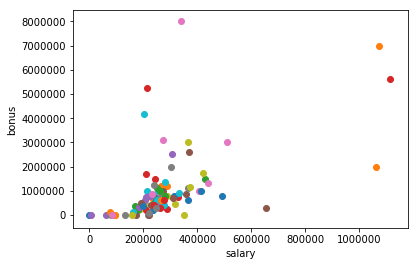

In [6]:
# The following code identifies outliers using visualization

data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [7]:
# Now remove the identified outlier which is the 'TOTAL' data point
data_dict.pop('TOTAL', 0)

# If a data has zero value for all features, it is not useful, so should be removed as outlier
# Identify the data points:
zero_keys = []
for key in data_dict:
    n = 0
    for ftr in all_ftrs:
        if data_dict[key][ftr] == 'NaN':
            n += 1
    if n == len(all_ftrs) - 1: # excluding the 'poi' key
        zero_keys.append(key)
print("\nData Points that Have NaN's for All Features:")
print zero_keys, '\n'  # 'LOCKHART EUGENE E'

# Now remove them
for key in zero_keys:
    data_dict.pop(key, 0)


Data Points that Have NaN's for All Features:
['LOCKHART EUGENE E'] 



In [8]:
###################################  
### STEP 3: CREATE NEW FEATURES ###
###################################    
 
# Store to my_dataset for easy export below.
my_dataset = data_dict

# Create a new feature "variable_to_fixed" which is the ratio of total variable pay
# (total stock options plus bonus) to total fixed pay (total payments minus bonus)
# The following code takes into acount various scenarios when bonus, total_pay and/or
# total_stock is zero and handles correspondingly by changing the formula
for key in my_dataset:
    bonus = my_dataset[key]['bonus']
    total_pay = my_dataset[key]['total_payments']
    total_stock = my_dataset[key]['total_stock_value']
    if bonus == 'NaN':
        bonus = 0
    if total_pay == 'NaN':
        if total_stock == 'NaN':
            my_dataset[key]['variable_to_fixed'] = bonus
        else:
            my_dataset[key]['variable_to_fixed'] = total_stock + bonus
    elif total_stock == 'NaN':
        my_dataset[key]['variable_to_fixed'] = float(bonus) / (total_pay - bonus)
    else:
        my_dataset[key]['variable_to_fixed'] = float(total_stock + bonus) / (total_pay - bonus)

'\n\n# Extract features and labels from dataset for local testing\ndata = featureFormat(my_dataset, features_list, sort_keys = True)\nlabels, features = targetFeatureSplit(data)\n\nprint "features data type:", type(features)\nprint "\nlabels"\nprint "labels data type:", type(labels)\nprint labels\n\n\n'

In [9]:
# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

print "features data type:", type(features)
print "\nlabels"
print "labels data type:", type(labels)
print labels

features data type: <type 'list'>

labels
labels data type: <type 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


In [10]:
##################################
### STEP 4: MAKE THE ESTIMATOR ###
##################################

# Prepare the pipeline including preprocessing, feature selection and algorithm running
# Algorithms: SVC(), LinearSVC(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB() 
pipe = make_pipeline(MinMaxScaler(),
                     SelectKBest(),
                     GaussianNB())

params = {#'pca__n_components': [2],
          'selectkbest__k': [4],
          'selectkbest__score_func': [f_classif],
          #'linearsvc__C': [0.1, 1, 10, 100],
          #'linearsvc__dual': [False],
          #'linearsvc__tol': [0.000001],
          #'kneighborsclassifier__n_neighbors': [1, 5],
          #'kneighborsclassifier__weights': ['uniform'], 
          #'kneighborsclassifier__algorithm': ['auto', 'ball_tree'],
          #'kneighborsclassifier__leaf_size': [1, 10],
          #'svc__C': [0.1, 1, 10, 100],
          #'svc__kernel': ['linear', 'rbf'],
          #'svc__gamma': [0.001, 0.0001],
          #'randomforestclassifier__n_estimators': [5, 10, 20]
          }

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            random_state=42)

# Make an StratifiedShuffleSplit iterator for cross-validation in GridSearchCV
sss = StratifiedShuffleSplit(labels_train,
                             n_iter = 20,
                             test_size = 0.5,
                             random_state = 0)

# Make the estimator using GridSearchCV and run cross-validation
print 'GridSearching with cross-validation...'
clf = GridSearchCV(pipe,
                   param_grid = params,
                   scoring = 'f1',
                   n_jobs = 1,
                   cv = sss,
                   verbose = 1,
                   error_score = 0)

GridSearching with cross-validation...


In [11]:
#########################################
### STEP 5: MODEL FITTING AND TESTING ###
#########################################

# Fit the model using premade estimator clf
clf.fit(features_train, labels_train)

# Calculate feature scores
scores = clf.best_estimator_.named_steps['selectkbest'].scores_
scores = [round(s, 2) for s in scores] #round to 2 decimal points

# Combine with features names and rank by score
ftr_score = zip(features_list[1:], scores)
ftr_score_sorted = sorted(ftr_score,
                          key = lambda item: item[1],
                          reverse = True) 
print "\nThe Scores for All the Features are:"
pprint(ftr_score_sorted)

Fitting 20 folds for each of 1 candidates, totalling 20 fits

The Scores for All the Features are:
[('bonus', 30.08),
 ('salary', 19.03),
 ('total_stock_value', 15.96),
 ('exercised_stock_options', 15.82),
 ('long_term_incentive', 11.36),
 ('deferred_income', 10.3),
 ('restricted_stock', 9.36),
 ('total_payments', 8.69),
 ('loan_advances', 6.42),
 ('expenses', 5.0),
 ('other', 3.77),
 ('director_fees', 1.87),
 ('restricted_stock_deferred', 0.83),
 ('deferral_payments', 0.09)]


C:\Users\georg\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [9] are constant.
  UserWarning)
C:\Users\georg\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [12]:
# Find out the features selected by SelectKBest
ftr_index = clf.best_estimator_.named_steps['selectkbest'].get_support()
ftrs = [x for x, y in zip(features_list[1:], ftr_index) if y]
print "\nThe Selected Features Are:\n", ftrs 

# Test the model using the hold-out test data
pred = clf.predict(features_test)
print '\n', "Classification Peformance Report:"
print(classification_report(labels_test, pred))


The Selected Features Are:
['salary', 'exercised_stock_options', 'bonus', 'total_stock_value']

Classification Peformance Report:
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96        27
        1.0       0.50      0.50      0.50         2

avg / total       0.93      0.93      0.93        29



In [ ]:
#########################################
### STEP 6: GENERATE THE PICKLE FILES ###
#########################################

dump_classifier_and_data(clf, my_dataset, features_list)


"""

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, scoring='precision')
print 'start fitting'
rfecv.fit(features, labels)
print 'fitting done'
print("Optimal number of features : %d" % rfecv.n_features_)
print rfecv.support_
features=features[:,rfecv.support_]
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()